# Reference calculations

This is preloading code.

In [1]:
from data_provider import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.hardcoded_in_file import *

print("Real data, test=ryanair, training=brexit")
testset = "ryanair"
test_provider = BSNLPBlindTest(types=[testset], training_data_provider=get_brexit_for_lang)
data = {}
for l in ["pl", "cs", "ru", "bg"]:
    if l not in data:
        data[l] = []
    for _, x in test_provider(l):
        data[l] += x
ner = PhrasePlugin(HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt"], 
                        cast=lambda x: (x[0],x[2])))
lemma = HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt.with_lemmas"], 
                        cast = lambda x: (x[0], x[1], x[2]))
ids = HardCodedInFile(data, ["application_data/test_data_from_bsnlp/annotated/"+testset+"/%s/*.txt.with_lemmas.with_ids"])

Real data, test=ryanair, training=brexit
Skipping answer:  ('российской федерации', 'российской федерация', 'LOC  GPE-Russia')  as it doesnt contain 4 elements
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements


Comparision of Type0 with and without local-matching and without.

In [2]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common

res = common.compare_methods(
    NULL = {"ner": ner, "lemmatizer": lemma, "identifier": null_solver.identifier},
    T0 = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier},
    T0_L = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier_with_localphrase},
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res[0], res[1:])

/home/bartek/.local/lib/python3.6/site-packages/pywikibot/config2.py:1121: UserWarning: Configuration variable "use_api_login" is defined in your user-config.py but unknown. It can be a misspelled one or a variable that is no longer supported.
  .format(name), UserWarning)
  0%|          | 0/3 [00:00<?, ?it/s]

Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements


 33%|███▎      | 1/3 [00:02<00:05,  2.81s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements


 67%|██████▋   | 2/3 [00:16<00:06,  6.03s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements


100%|██████████| 3/3 [00:29<00:00,  9.92s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'function'>
Got exception 

Lang     |Category |Method   |F1       |PRECIS   |P[NUM]   |RECALL   |R[NUM]   |metric   |
--------------------------------------------------------------
All      |All      |NULL     |0.375203 |0.625077 |5587     |0.268050 |5525     |Lea      |
All      |All      |T0       |0.375584 |0.626163 |5587     |0.268239 |5525     |Lea      |
All      |All      |T0_L     |0.362304 |0.634830 |5587     |0.253485 |5525     |Lea      |
--------------------------------------------------------------
All      |EVT      |NULL     |0.114805 |0.156250 |23       |0.090737 |32       |Lea      |
All      |EVT      |T0       |0.114805 |0.156250 |23       |0.090737 |32       |Lea      |
All      |EVT      |T0_L     |0.114805 |0.156250 |23       |0.090737 |32       |Lea      |
-------

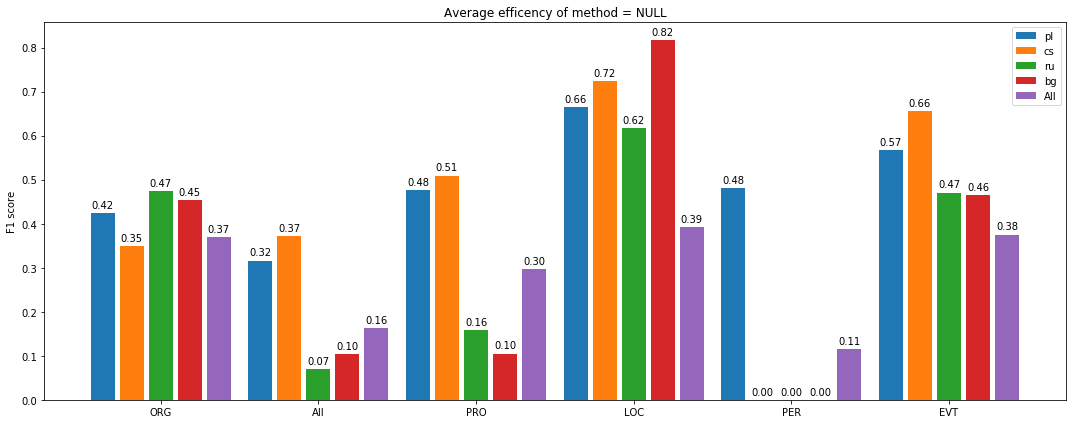

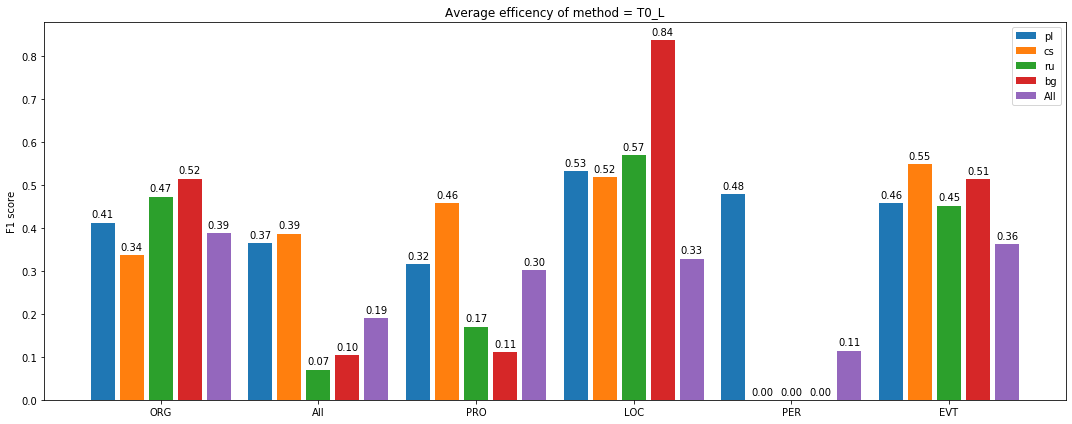

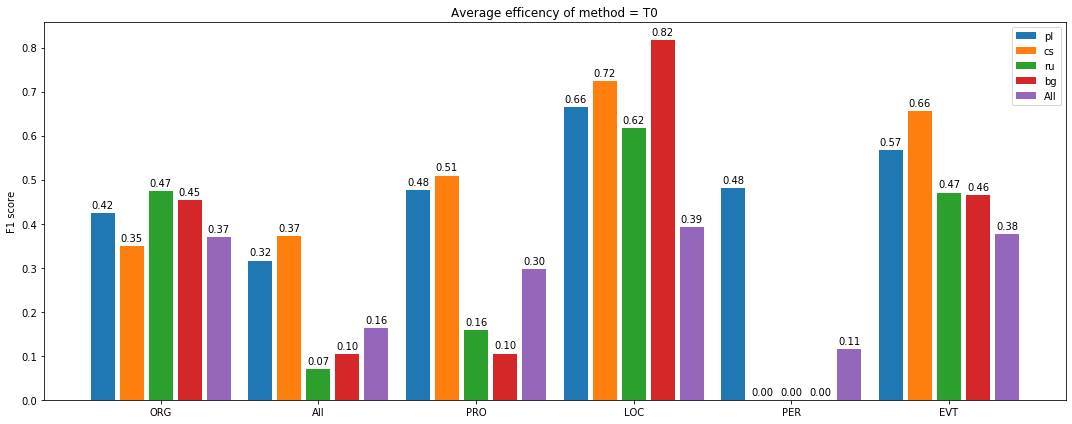

In [3]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res)

## Wikidata

In [9]:
from solvers.wikidatan import repository
gl_rep = repository.Repository(preload_dictionaries=True)

Load  PRO
Loaded  2883230 / 10948798  [ 26 %] with pr =  15


100%|██████████| 2928471/2928471 [00:17<00:00, 171998.25it/s]


Load  PER
Loaded  637931 / 4996472  [ 12 %] with pr =  3


100%|██████████| 1359070/1359070 [00:02<00:00, 497583.14it/s]


Load  ORG
Loaded  158233 / 1548034  [ 10 %] with pr =  9


100%|██████████| 371840/371840 [00:00<00:00, 496729.05it/s]


Load  EVT
Loaded  186248 / 5838749  [ 3 %] with pr =  4


100%|██████████| 470475/470475 [00:01<00:00, 464740.29it/s]


Load  LOC
Loaded  95966 / 9899927  [ 0 %] with pr =  25


100%|██████████| 258489/258489 [00:00<00:00, 528989.76it/s]


In [12]:
import importlib
importlib.reload(simplefixer)
importlib.reload(visualize)
importlib.reload(fasttext_decorator)

<module 'fasttext_decorator' from '/media/bartek/ADDITIONAL/kopie_i_praca_magisterska/bsnlp_workspace/entity-recognition/src/fasttext_decorator.py'>

In [ ]:
from solvers import null_solver, prophecy, type0, wikidata, wikidata2
from solvers.fixers import simplefixer
from solvers.wikidatan import identifier
from metrics import mentions_catch, lea
from collections import defaultdict
from solvers.dummy.hardcoded_in_file import *
from solvers.dummy.phrase_plugin import *
from solvers.dummy.lemma_plugin import *
from data_provider import *
import visualize
import fasttext_decorator
from polyglot_decorator import *
from solvers import null_solver
import common
fixer = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
sep_fixer = simplefixer.SeparateFixer(gl_rep, [{"lang": "pl", "cat": "ORG", "th": 0.9}, {"lang": "pl", "cat": "EVT", "th": 0.8}])
fixer2 = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG"], enrich=False)
res2 = common.compare_methods(
#     H_RAW = {"ner": ner, "lemmatizer": lemma, "identifier": identifier.Type1Identifier()},
    WH = {"ner": ner, "lemmatizer": lemma, "identifier": identifier.Identifier(gl_rep)},
    WH_F = {"ner": ner, "lemmatizer": lemma, 
              "identifier": identifier.Identifier(gl_rep), 
               "answer_fixer": fixer},
    BSNLP = {"ner": ner, "lemmatizer": lemma, 
              "identifier": identifier.Identifier(gl_rep), 
               "answer_fixer": fixer2
              },
    test_provider = test_provider,
    metric_factory=lambda:lea.Lea(exact=True)
)
visualize.summarize_results(res2[0], res2[1:])


  0%|          | 0/3 [00:00<?, ?it/s]

Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements
Skipping answer:  ('Leave.EU', 'Leave.EU', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Днес+', 'Днес+', 'ORG')  as it doesnt contain 4 elements
Skipping answer:  ('Би Би Си', 'Би Би Си', 'PRO')  as it doesnt contain 4 elements



 33%|███▎      | 1/3 [04:04<08:08, 244.31s/it]

Flush on  ner <class 'solvers.dummy.phrase_plugin.PhrasePlugin'>
Got exception 
Flush on  lemmatizer <class 'solvers.dummy.hardcoded_in_file.HardCodedInFile'>
Got exception 
Flush on  identifier <class 'solvers.wikidatan.identifier.Identifier'>
Identifier is Flushing
Loading vect for lang =  pl
Recalculating transformation for lang =  pl




reading from file:   0%|          | 0/2000000 [00:00<?, ?it/s]

reading from file:   0%|          | 1083/2000000 [00:00<03:04, 10827.48it/s]

reading from file:   0%|          | 2328/2000000 [00:00<02:57, 11267.07it/s]

reading from file:   0%|          | 3559/2000000 [00:00<02:52, 11558.90it/s]

reading from file:   0%|          | 4827/2000000 [00:00<02:48, 11872.73it/s]

reading from file:   0%|          | 6114/2000000 [00:00<02:44, 12153.73it/s]

reading from file:   0%|          | 7420/2000000 [00:00<02:40, 12410.88it/s]

reading from file:   0%|          | 8624/2000000 [00:00<02:41, 12296.14it/s]

reading from file:   0%|          | 9861/2000000 [00:00<02:41, 12315.63it/s]

reading from file:   1%|          | 11125/2000000 [00:00<02:40, 12411.09it/s]

reading from file:   1%|          | 12424/2000000 [00:01<02:38, 12578.11it/s]

reading from file:   1%|          | 13654/2000000 [00:01<02:42, 12251.04it/s]

reading from file:   1%|          | 14900/2000000 [00:01<02:41, 12311.48i

reading from file:   6%|▌         | 123260/2000000 [00:09<02:25, 12892.09it/s]

reading from file:   6%|▌         | 124551/2000000 [00:09<02:26, 12823.22it/s]

reading from file:   6%|▋         | 125866/2000000 [00:09<02:25, 12916.35it/s]

reading from file:   6%|▋         | 127184/2000000 [00:10<02:24, 12992.93it/s]

reading from file:   6%|▋         | 128494/2000000 [00:10<02:23, 13024.41it/s]

reading from file:   6%|▋         | 129799/2000000 [00:10<02:23, 13030.52it/s]

reading from file:   7%|▋         | 131119/2000000 [00:10<02:22, 13080.60it/s]

reading from file:   7%|▋         | 132428/2000000 [00:10<02:25, 12825.44it/s]

reading from file:   7%|▋         | 133712/2000000 [00:10<02:25, 12799.02it/s]

reading from file:   7%|▋         | 135040/2000000 [00:10<02:24, 12937.08it/s]

reading from file:   7%|▋         | 136335/2000000 [00:10<02:24, 12871.48it/s]

reading from file:   7%|▋         | 137659/2000000 [00:10<02:23, 12977.92it/s]

reading from file:   7%|▋         | 1389

reading from file:  12%|█▏        | 246157/2000000 [00:19<02:13, 13109.31it/s]

reading from file:  12%|█▏        | 247470/2000000 [00:19<02:13, 13114.41it/s]

reading from file:  12%|█▏        | 248782/2000000 [00:19<02:14, 13022.33it/s]

reading from file:  13%|█▎        | 250085/2000000 [00:19<02:15, 12928.98it/s]

reading from file:  13%|█▎        | 251397/2000000 [00:19<02:14, 12983.21it/s]

reading from file:  13%|█▎        | 252728/2000000 [00:19<02:13, 13076.92it/s]

reading from file:  13%|█▎        | 254075/2000000 [00:19<02:12, 13190.80it/s]

reading from file:  13%|█▎        | 255395/2000000 [00:20<02:12, 13181.08it/s]

reading from file:  13%|█▎        | 256728/2000000 [00:20<02:11, 13225.38it/s]

reading from file:  13%|█▎        | 258084/2000000 [00:20<02:10, 13323.80it/s]

reading from file:  13%|█▎        | 259420/2000000 [00:20<02:10, 13331.81it/s]

reading from file:  13%|█▎        | 260754/2000000 [00:20<02:10, 13317.92it/s]

reading from file:  13%|█▎        | 2620

reading from file:  18%|█▊        | 369478/2000000 [00:29<02:07, 12821.70it/s]

reading from file:  19%|█▊        | 370796/2000000 [00:29<02:06, 12925.60it/s]

reading from file:  19%|█▊        | 372119/2000000 [00:29<02:05, 13013.79it/s]

reading from file:  19%|█▊        | 373442/2000000 [00:29<02:04, 13071.11it/s]

reading from file:  19%|█▊        | 374769/2000000 [00:29<02:03, 13129.33it/s]

reading from file:  19%|█▉        | 376084/2000000 [00:29<02:05, 12888.77it/s]

reading from file:  19%|█▉        | 377383/2000000 [00:29<02:05, 12916.92it/s]

reading from file:  19%|█▉        | 378688/2000000 [00:29<02:05, 12952.73it/s]

reading from file:  19%|█▉        | 380018/2000000 [00:30<02:04, 13054.44it/s]

reading from file:  19%|█▉        | 381325/2000000 [00:30<02:04, 12975.67it/s]

reading from file:  19%|█▉        | 382624/2000000 [00:30<02:05, 12855.57it/s]

reading from file:  19%|█▉        | 383911/2000000 [00:30<02:07, 12675.98it/s]

reading from file:  19%|█▉        | 3851

reading from file:  25%|██▍       | 491423/2000000 [00:38<02:02, 12310.40it/s]

reading from file:  25%|██▍       | 492657/2000000 [00:38<02:05, 12027.50it/s]

reading from file:  25%|██▍       | 493943/2000000 [00:39<02:02, 12265.01it/s]

reading from file:  25%|██▍       | 495250/2000000 [00:39<02:00, 12494.63it/s]

reading from file:  25%|██▍       | 496527/2000000 [00:39<01:59, 12573.96it/s]

reading from file:  25%|██▍       | 497787/2000000 [00:39<02:00, 12446.41it/s]

reading from file:  25%|██▍       | 499052/2000000 [00:39<02:00, 12506.46it/s]

reading from file:  25%|██▌       | 500318/2000000 [00:39<01:59, 12551.99it/s]

reading from file:  25%|██▌       | 501575/2000000 [00:39<02:21, 10574.30it/s]

reading from file:  25%|██▌       | 502818/2000000 [00:39<02:15, 11069.93it/s]

reading from file:  25%|██▌       | 504102/2000000 [00:39<02:09, 11546.98it/s]

reading from file:  25%|██▌       | 505385/2000000 [00:40<02:05, 11902.63it/s]

reading from file:  25%|██▌       | 5066

reading from file:  31%|███       | 613409/2000000 [00:48<01:52, 12363.16it/s]

reading from file:  31%|███       | 614650/2000000 [00:48<01:55, 12009.40it/s]

reading from file:  31%|███       | 615934/2000000 [00:48<01:53, 12244.82it/s]

reading from file:  31%|███       | 617244/2000000 [00:48<01:50, 12487.26it/s]

reading from file:  31%|███       | 618518/2000000 [00:49<01:49, 12560.35it/s]

reading from file:  31%|███       | 619807/2000000 [00:49<01:49, 12656.40it/s]

reading from file:  31%|███       | 621076/2000000 [00:49<01:49, 12611.76it/s]

reading from file:  31%|███       | 622339/2000000 [00:49<01:49, 12577.36it/s]

reading from file:  31%|███       | 623629/2000000 [00:49<01:48, 12671.75it/s]

reading from file:  31%|███       | 624898/2000000 [00:49<01:48, 12666.31it/s]

reading from file:  31%|███▏      | 626166/2000000 [00:49<01:49, 12516.97it/s]

reading from file:  31%|███▏      | 627419/2000000 [00:49<01:51, 12352.03it/s]

reading from file:  31%|███▏      | 6286

reading from file:  37%|███▋      | 734851/2000000 [00:58<01:48, 11669.99it/s]

reading from file:  37%|███▋      | 736101/2000000 [00:58<01:46, 11904.26it/s]

reading from file:  37%|███▋      | 737379/2000000 [00:58<01:43, 12153.69it/s]

reading from file:  37%|███▋      | 738623/2000000 [00:58<01:43, 12236.89it/s]

reading from file:  37%|███▋      | 739964/2000000 [00:59<01:40, 12564.79it/s]

reading from file:  37%|███▋      | 741226/2000000 [00:59<01:47, 11737.44it/s]

reading from file:  37%|███▋      | 742495/2000000 [00:59<01:44, 12006.42it/s]

reading from file:  37%|███▋      | 743768/2000000 [00:59<01:42, 12212.20it/s]

reading from file:  37%|███▋      | 745061/2000000 [00:59<01:41, 12418.69it/s]

reading from file:  37%|███▋      | 746351/2000000 [00:59<01:39, 12557.58it/s]

reading from file:  37%|███▋      | 747613/2000000 [00:59<01:41, 12327.94it/s]

reading from file:  37%|███▋      | 748935/2000000 [00:59<01:39, 12581.82it/s]

reading from file:  38%|███▊      | 7502

reading from file:  43%|████▎     | 858046/2000000 [01:08<01:34, 12106.59it/s]

reading from file:  43%|████▎     | 859262/2000000 [01:08<01:35, 11949.39it/s]

reading from file:  43%|████▎     | 860510/2000000 [01:08<01:34, 12103.51it/s]

reading from file:  43%|████▎     | 861724/2000000 [01:08<01:35, 11908.26it/s]

reading from file:  43%|████▎     | 863010/2000000 [01:08<01:33, 12176.77it/s]

reading from file:  43%|████▎     | 864232/2000000 [01:08<01:34, 11999.48it/s]

reading from file:  43%|████▎     | 865518/2000000 [01:08<01:32, 12243.11it/s]

reading from file:  43%|████▎     | 866791/2000000 [01:09<01:31, 12384.13it/s]

reading from file:  43%|████▎     | 868033/2000000 [01:09<01:31, 12337.03it/s]

reading from file:  43%|████▎     | 869330/2000000 [01:09<01:30, 12519.97it/s]

reading from file:  44%|████▎     | 870585/2000000 [01:09<01:30, 12514.10it/s]

reading from file:  44%|████▎     | 871905/2000000 [01:09<01:28, 12710.71it/s]

reading from file:  44%|████▎     | 8732

reading from file:  49%|████▉     | 980221/2000000 [01:18<01:19, 12810.40it/s]

reading from file:  49%|████▉     | 981532/2000000 [01:18<01:18, 12897.51it/s]

reading from file:  49%|████▉     | 982831/2000000 [01:18<01:18, 12923.35it/s]

reading from file:  49%|████▉     | 984164/2000000 [01:18<01:17, 13041.67it/s]

reading from file:  49%|████▉     | 985470/2000000 [01:18<01:18, 12956.27it/s]

reading from file:  49%|████▉     | 986767/2000000 [01:18<01:18, 12886.88it/s]

reading from file:  49%|████▉     | 988057/2000000 [01:18<01:20, 12585.08it/s]

reading from file:  49%|████▉     | 989343/2000000 [01:18<01:19, 12659.95it/s]

reading from file:  50%|████▉     | 990623/2000000 [01:18<01:19, 12700.00it/s]

reading from file:  50%|████▉     | 991895/2000000 [01:19<01:21, 12329.95it/s]

reading from file:  50%|████▉     | 993137/2000000 [01:19<01:21, 12356.24it/s]

reading from file:  50%|████▉     | 994375/2000000 [01:19<01:21, 12346.18it/s]

reading from file:  50%|████▉     | 9956

reading from file:  55%|█████▌    | 1100822/2000000 [01:27<01:11, 12549.92it/s]

reading from file:  55%|█████▌    | 1102100/2000000 [01:27<01:11, 12616.83it/s]

reading from file:  55%|█████▌    | 1103363/2000000 [01:27<01:12, 12427.66it/s]

reading from file:  55%|█████▌    | 1104681/2000000 [01:27<01:10, 12643.18it/s]

reading from file:  55%|█████▌    | 1105971/2000000 [01:28<01:10, 12719.02it/s]

reading from file:  55%|█████▌    | 1107266/2000000 [01:28<01:09, 12785.14it/s]

reading from file:  55%|█████▌    | 1108607/2000000 [01:28<01:08, 12964.98it/s]

reading from file:  55%|█████▌    | 1109905/2000000 [01:28<01:09, 12869.53it/s]

reading from file:  56%|█████▌    | 1111239/2000000 [01:28<01:08, 13006.07it/s]

reading from file:  56%|█████▌    | 1112582/2000000 [01:28<01:07, 13129.66it/s]

reading from file:  56%|█████▌    | 1113897/2000000 [01:28<01:09, 12801.95it/s]

reading from file:  56%|█████▌    | 1115180/2000000 [01:28<01:09, 12779.04it/s]

reading from file:  56%|████

reading from file:  61%|██████    | 1222099/2000000 [01:37<01:01, 12728.46it/s]

reading from file:  61%|██████    | 1223402/2000000 [01:37<01:00, 12811.74it/s]

reading from file:  61%|██████    | 1224734/2000000 [01:37<00:59, 12957.96it/s]

reading from file:  61%|██████▏   | 1226031/2000000 [01:37<00:59, 12940.78it/s]

reading from file:  61%|██████▏   | 1227326/2000000 [01:37<01:01, 12630.59it/s]

reading from file:  61%|██████▏   | 1228592/2000000 [01:37<01:08, 11222.98it/s]

reading from file:  61%|██████▏   | 1229873/2000000 [01:37<01:06, 11655.43it/s]

reading from file:  62%|██████▏   | 1231101/2000000 [01:38<01:04, 11834.34it/s]

reading from file:  62%|██████▏   | 1232328/2000000 [01:38<01:04, 11959.37it/s]

reading from file:  62%|██████▏   | 1233546/2000000 [01:38<01:03, 12024.24it/s]

reading from file:  62%|██████▏   | 1234762/2000000 [01:38<01:03, 12063.65it/s]

reading from file:  62%|██████▏   | 1235975/2000000 [01:38<01:03, 12043.83it/s]

reading from file:  62%|████

reading from file:  66%|██████▋   | 1326378/2000000 [01:47<00:57, 11752.16it/s]

reading from file:  66%|██████▋   | 1327556/2000000 [01:47<00:59, 11293.98it/s]

reading from file:  66%|██████▋   | 1328693/2000000 [01:47<00:59, 11316.48it/s]

reading from file:  66%|██████▋   | 1329917/2000000 [01:48<00:57, 11577.16it/s]

reading from file:  67%|██████▋   | 1331104/2000000 [01:48<00:57, 11661.86it/s]

reading from file:  67%|██████▋   | 1332305/2000000 [01:48<00:56, 11763.88it/s]

reading from file:  67%|██████▋   | 1333484/2000000 [01:48<01:03, 10551.33it/s]

reading from file:  67%|██████▋   | 1334614/2000000 [01:48<01:01, 10759.63it/s]

reading from file:  67%|██████▋   | 1335785/2000000 [01:48<01:00, 11026.88it/s]

reading from file:  67%|██████▋   | 1336903/2000000 [01:48<00:59, 11061.93it/s]

reading from file:  67%|██████▋   | 1338049/2000000 [01:48<00:59, 11177.66it/s]

reading from file:  67%|██████▋   | 1339240/2000000 [01:48<00:58, 11386.21it/s]

reading from file:  67%|████

reading from file:  72%|███████▏  | 1439457/2000000 [01:57<00:46, 12131.77it/s]

reading from file:  72%|███████▏  | 1440672/2000000 [01:57<00:46, 12077.10it/s]

reading from file:  72%|███████▏  | 1441881/2000000 [01:57<00:46, 11998.58it/s]

reading from file:  72%|███████▏  | 1443108/2000000 [01:57<00:46, 12075.84it/s]

reading from file:  72%|███████▏  | 1444342/2000000 [01:57<00:45, 12153.22it/s]

reading from file:  72%|███████▏  | 1445569/2000000 [01:57<00:45, 12187.29it/s]

reading from file:  72%|███████▏  | 1446789/2000000 [01:58<00:46, 11947.78it/s]

reading from file:  72%|███████▏  | 1448028/2000000 [01:58<00:45, 12076.97it/s]

reading from file:  72%|███████▏  | 1449268/2000000 [01:58<00:45, 12169.74it/s]

reading from file:  73%|███████▎  | 1450499/2000000 [01:58<00:45, 12209.84it/s]

reading from file:  73%|███████▎  | 1451721/2000000 [01:58<00:54, 10039.73it/s]

reading from file:  73%|███████▎  | 1452790/2000000 [01:58<00:55, 9884.34it/s] 

reading from file:  73%|████

reading from file:  78%|███████▊  | 1552861/2000000 [02:07<00:56, 7951.24it/s]

reading from file:  78%|███████▊  | 1553803/2000000 [02:07<00:53, 8339.82it/s]

reading from file:  78%|███████▊  | 1555063/2000000 [02:08<00:47, 9280.19it/s]

reading from file:  78%|███████▊  | 1556318/2000000 [02:08<00:44, 10066.36it/s]

reading from file:  78%|███████▊  | 1557565/2000000 [02:08<00:41, 10683.86it/s]

reading from file:  78%|███████▊  | 1558795/2000000 [02:08<00:39, 11120.62it/s]

reading from file:  78%|███████▊  | 1560035/2000000 [02:08<00:38, 11474.52it/s]

reading from file:  78%|███████▊  | 1561223/2000000 [02:08<00:38, 11466.55it/s]

reading from file:  78%|███████▊  | 1562398/2000000 [02:08<00:38, 11427.25it/s]

reading from file:  78%|███████▊  | 1563701/2000000 [02:08<00:36, 11863.84it/s]

reading from file:  78%|███████▊  | 1564947/2000000 [02:08<00:36, 12036.52it/s]

reading from file:  78%|███████▊  | 1566216/2000000 [02:08<00:35, 12219.37it/s]

reading from file:  78%|███████

reading from file:  83%|████████▎ | 1669442/2000000 [02:17<00:27, 11977.74it/s]

reading from file:  84%|████████▎ | 1670650/2000000 [02:17<00:27, 12000.62it/s]

reading from file:  84%|████████▎ | 1671858/2000000 [02:17<00:27, 11761.21it/s]

reading from file:  84%|████████▎ | 1673041/2000000 [02:17<00:27, 11727.22it/s]

reading from file:  84%|████████▎ | 1674299/2000000 [02:17<00:27, 11969.31it/s]

reading from file:  84%|████████▍ | 1675558/2000000 [02:18<00:26, 12147.24it/s]

reading from file:  84%|████████▍ | 1676803/2000000 [02:18<00:26, 12231.73it/s]

reading from file:  84%|████████▍ | 1678030/2000000 [02:18<00:26, 12241.20it/s]

reading from file:  84%|████████▍ | 1679286/2000000 [02:18<00:26, 12334.01it/s]

reading from file:  84%|████████▍ | 1680524/2000000 [02:18<00:25, 12346.62it/s]

reading from file:  84%|████████▍ | 1681760/2000000 [02:18<00:25, 12284.37it/s]

reading from file:  84%|████████▍ | 1682990/2000000 [02:18<00:27, 11711.28it/s]

reading from file:  84%|████

reading from file:  89%|████████▊ | 1774203/2000000 [02:27<00:35, 6383.75it/s]

reading from file:  89%|████████▉ | 1775466/2000000 [02:27<00:29, 7495.68it/s]

reading from file:  89%|████████▉ | 1776729/2000000 [02:28<00:26, 8536.50it/s]

reading from file:  89%|████████▉ | 1777999/2000000 [02:28<00:23, 9466.77it/s]

reading from file:  89%|████████▉ | 1779237/2000000 [02:28<00:21, 10184.39it/s]

reading from file:  89%|████████▉ | 1780481/2000000 [02:28<00:20, 10770.03it/s]

reading from file:  89%|████████▉ | 1781733/2000000 [02:28<00:19, 11240.29it/s]

reading from file:  89%|████████▉ | 1782931/2000000 [02:28<00:19, 11413.73it/s]

reading from file:  89%|████████▉ | 1784125/2000000 [02:28<00:19, 11214.12it/s]

reading from file:  89%|████████▉ | 1785376/2000000 [02:28<00:18, 11573.69it/s]

reading from file:  89%|████████▉ | 1786664/2000000 [02:28<00:17, 11934.91it/s]

reading from file:  89%|████████▉ | 1787881/2000000 [02:28<00:17, 12000.23it/s]

reading from file:  89%|████████

reading from file:  95%|█████████▍| 1890019/2000000 [02:37<00:08, 12283.92it/s]

reading from file:  95%|█████████▍| 1891252/2000000 [02:37<00:08, 12294.06it/s]

reading from file:  95%|█████████▍| 1892517/2000000 [02:38<00:08, 12398.66it/s]

reading from file:  95%|█████████▍| 1893758/2000000 [02:38<00:08, 12289.91it/s]

reading from file:  95%|█████████▍| 1895024/2000000 [02:38<00:08, 12397.34it/s]

reading from file:  95%|█████████▍| 1896287/2000000 [02:38<00:08, 12465.83it/s]

reading from file:  95%|█████████▍| 1897555/2000000 [02:38<00:08, 12527.20it/s]

reading from file:  95%|█████████▍| 1898809/2000000 [02:38<00:08, 12512.89it/s]

reading from file:  95%|█████████▌| 1900061/2000000 [02:38<00:09, 10824.80it/s]

reading from file:  95%|█████████▌| 1901310/2000000 [02:38<00:08, 11274.87it/s]

reading from file:  95%|█████████▌| 1902554/2000000 [02:38<00:08, 11599.74it/s]

reading from file:  95%|█████████▌| 1903771/2000000 [02:39<00:08, 11763.89it/s]

reading from file:  95%|████

reading from file: 100%|█████████▉| 1996230/2000000 [02:48<00:00, 12275.21it/s]

reading from file: 100%|█████████▉| 1997466/2000000 [02:48<00:00, 11997.31it/s]

reading from file: 100%|█████████▉| 1998673/2000000 [02:48<00:00, 11985.69it/s]

reading from file: 100%|██████████| 2000000/2000000 [02:48<00:00, 11857.59it/s]


transforming:   0%|          | 0/2000000 [00:00<?, ?it/s]

transforming:   0%|          | 622/2000000 [00:00<05:21, 6219.68it/s]

transforming:   0%|          | 1206/2000000 [00:00<05:27, 6098.00it/s]

transforming:   0%|          | 1694/2000000 [00:00<05:52, 5673.18it/s]

transforming:   0%|          | 2233/2000000 [00:00<05:57, 5584.25it/s]

transforming:   0%|          | 2835/2000000 [00:00<05:49, 5706.85it/s]

transforming:   0%|          | 3434/2000000 [00:00<05:44, 5788.22it/s]

transforming:   0%|          | 4034/2000000 [00:00<05:41, 5848.50it/s]

transforming:   0%|          | 4570/2000000 [00:00<06:00, 5531.90it/s]

transforming:   0%|          | 5170/20000

transforming:   3%|▎         | 54507/2000000 [00:10<06:44, 4815.30it/s]

transforming:   3%|▎         | 55002/2000000 [00:10<06:42, 4828.90it/s]

transforming:   3%|▎         | 55571/2000000 [00:11<06:24, 5057.40it/s]

transforming:   3%|▎         | 56149/2000000 [00:11<06:10, 5252.51it/s]

transforming:   3%|▎         | 56745/2000000 [00:11<05:56, 5444.58it/s]

transforming:   3%|▎         | 57327/2000000 [00:11<05:50, 5550.43it/s]

transforming:   3%|▎         | 57899/2000000 [00:11<05:46, 5598.16it/s]

transforming:   3%|▎         | 58497/2000000 [00:11<05:40, 5705.75it/s]

transforming:   3%|▎         | 59072/2000000 [00:11<05:40, 5706.15it/s]

transforming:   3%|▎         | 59668/2000000 [00:11<05:35, 5778.22it/s]

transforming:   3%|▎         | 60248/2000000 [00:11<06:00, 5381.63it/s]

transforming:   3%|▎         | 60838/2000000 [00:11<05:50, 5525.96it/s]

transforming:   3%|▎         | 61434/2000000 [00:12<05:43, 5647.15it/s]

transforming:   3%|▎         | 62004/2000000 [00:12

transforming:   6%|▌         | 112208/2000000 [00:21<07:05, 4433.13it/s]

transforming:   6%|▌         | 112653/2000000 [00:21<07:32, 4167.51it/s]

transforming:   6%|▌         | 113196/2000000 [00:21<07:01, 4478.71it/s]

transforming:   6%|▌         | 113759/2000000 [00:22<06:35, 4770.98it/s]

transforming:   6%|▌         | 114327/2000000 [00:22<06:16, 5010.33it/s]

transforming:   6%|▌         | 114899/2000000 [00:22<06:02, 5202.63it/s]

transforming:   6%|▌         | 115458/2000000 [00:22<05:54, 5311.27it/s]

transforming:   6%|▌         | 116021/2000000 [00:22<05:48, 5402.27it/s]

transforming:   6%|▌         | 116591/2000000 [00:22<05:43, 5486.84it/s]

transforming:   6%|▌         | 117145/2000000 [00:22<05:42, 5502.02it/s]

transforming:   6%|▌         | 117714/2000000 [00:22<05:38, 5556.29it/s]

transforming:   6%|▌         | 118272/2000000 [00:22<05:57, 5258.96it/s]

transforming:   6%|▌         | 118835/2000000 [00:22<05:50, 5361.60it/s]

transforming:   6%|▌         | 119376/

transforming:   8%|▊         | 167881/2000000 [00:32<06:01, 5066.10it/s]

transforming:   8%|▊         | 168424/2000000 [00:32<06:09, 4957.51it/s]

transforming:   8%|▊         | 168958/2000000 [00:32<06:01, 5064.98it/s]

transforming:   8%|▊         | 169527/2000000 [00:33<05:49, 5235.56it/s]

transforming:   9%|▊         | 170054/2000000 [00:33<05:57, 5118.26it/s]

transforming:   9%|▊         | 170646/2000000 [00:33<05:42, 5334.56it/s]

transforming:   9%|▊         | 171217/2000000 [00:33<05:36, 5440.88it/s]

transforming:   9%|▊         | 171813/2000000 [00:33<05:27, 5585.95it/s]

transforming:   9%|▊         | 172408/2000000 [00:33<05:21, 5688.90it/s]

transforming:   9%|▊         | 173006/2000000 [00:33<05:16, 5770.93it/s]

transforming:   9%|▊         | 173602/2000000 [00:33<05:13, 5825.40it/s]

transforming:   9%|▊         | 174187/2000000 [00:33<05:55, 5139.95it/s]

transforming:   9%|▊         | 174769/2000000 [00:33<05:42, 5325.16it/s]

transforming:   9%|▉         | 175358/

transforming:  11%|█▏        | 225631/2000000 [00:43<05:25, 5454.58it/s]

transforming:  11%|█▏        | 226191/2000000 [00:43<05:32, 5333.29it/s]

transforming:  11%|█▏        | 226735/2000000 [00:43<05:31, 5342.19it/s]

transforming:  11%|█▏        | 227297/2000000 [00:43<05:27, 5420.63it/s]

transforming:  11%|█▏        | 227845/2000000 [00:43<05:43, 5156.16it/s]

transforming:  11%|█▏        | 228406/2000000 [00:43<05:35, 5283.82it/s]

transforming:  11%|█▏        | 228961/2000000 [00:44<05:30, 5359.48it/s]

transforming:  11%|█▏        | 229516/2000000 [00:44<05:27, 5414.20it/s]

transforming:  12%|█▏        | 230063/2000000 [00:44<05:25, 5430.50it/s]

transforming:  12%|█▏        | 230610/2000000 [00:44<05:25, 5440.19it/s]

transforming:  12%|█▏        | 231173/2000000 [00:44<05:21, 5494.68it/s]

transforming:  12%|█▏        | 231724/2000000 [00:44<06:01, 4895.17it/s]

transforming:  12%|█▏        | 232309/2000000 [00:44<05:43, 5146.43it/s]

transforming:  12%|█▏        | 232837/

transforming:  14%|█▍        | 283235/2000000 [00:54<05:18, 5388.61it/s]

transforming:  14%|█▍        | 283791/2000000 [00:54<05:15, 5437.23it/s]

transforming:  14%|█▍        | 284381/2000000 [00:54<05:08, 5567.01it/s]

transforming:  14%|█▍        | 284978/2000000 [00:54<05:01, 5680.36it/s]

transforming:  14%|█▍        | 285573/2000000 [00:54<04:57, 5756.45it/s]

transforming:  14%|█▍        | 286163/2000000 [00:54<04:55, 5797.23it/s]

transforming:  14%|█▍        | 286757/2000000 [00:54<04:53, 5838.73it/s]

transforming:  14%|█▍        | 287343/2000000 [00:54<05:11, 5502.19it/s]

transforming:  14%|█▍        | 287899/2000000 [00:55<05:28, 5210.55it/s]

transforming:  14%|█▍        | 288450/2000000 [00:55<05:23, 5296.45it/s]

transforming:  14%|█▍        | 289010/2000000 [00:55<05:17, 5383.70it/s]

transforming:  14%|█▍        | 289553/2000000 [00:55<05:17, 5389.20it/s]

transforming:  15%|█▍        | 290095/2000000 [00:55<05:39, 5033.67it/s]

transforming:  15%|█▍        | 290669/

transforming:  17%|█▋        | 340394/2000000 [01:04<05:25, 5100.61it/s]

transforming:  17%|█▋        | 340911/2000000 [01:04<05:33, 4978.70it/s]

transforming:  17%|█▋        | 341504/2000000 [01:05<05:17, 5230.27it/s]

transforming:  17%|█▋        | 342098/2000000 [01:05<05:05, 5423.61it/s]

transforming:  17%|█▋        | 342696/2000000 [01:05<04:57, 5579.17it/s]

transforming:  17%|█▋        | 343271/2000000 [01:05<04:54, 5627.28it/s]

transforming:  17%|█▋        | 343849/2000000 [01:05<04:52, 5670.89it/s]

transforming:  17%|█▋        | 344435/2000000 [01:05<04:49, 5725.32it/s]

transforming:  17%|█▋        | 345032/2000000 [01:05<04:45, 5794.89it/s]

transforming:  17%|█▋        | 345634/2000000 [01:05<04:42, 5858.66it/s]

transforming:  17%|█▋        | 346222/2000000 [01:05<05:00, 5497.54it/s]

transforming:  17%|█▋        | 346816/2000000 [01:05<04:54, 5622.22it/s]

transforming:  17%|█▋        | 347416/2000000 [01:06<04:48, 5728.84it/s]

transforming:  17%|█▋        | 347993/

transforming:  20%|█▉        | 396773/2000000 [01:15<05:29, 4871.71it/s]

transforming:  20%|█▉        | 397298/2000000 [01:15<05:21, 4977.74it/s]

transforming:  20%|█▉        | 397872/2000000 [01:15<05:09, 5182.95it/s]

transforming:  20%|█▉        | 398412/2000000 [01:15<05:05, 5244.73it/s]

transforming:  20%|█▉        | 398996/2000000 [01:15<04:56, 5408.53it/s]

transforming:  20%|█▉        | 399573/2000000 [01:16<04:50, 5510.45it/s]

transforming:  20%|██        | 400165/2000000 [01:16<04:44, 5625.25it/s]

transforming:  20%|██        | 400755/2000000 [01:16<04:40, 5703.57it/s]

transforming:  20%|██        | 401329/2000000 [01:16<04:39, 5713.57it/s]

transforming:  20%|██        | 401917/2000000 [01:16<04:37, 5762.49it/s]

transforming:  20%|██        | 402505/2000000 [01:16<04:35, 5795.37it/s]

transforming:  20%|██        | 403086/2000000 [01:16<04:37, 5747.53it/s]

transforming:  20%|██        | 403662/2000000 [01:16<04:38, 5740.22it/s]

transforming:  20%|██        | 404237/

transforming:  23%|██▎       | 452444/2000000 [01:26<05:26, 4743.33it/s]

transforming:  23%|██▎       | 452965/2000000 [01:26<05:17, 4872.52it/s]

transforming:  23%|██▎       | 453521/2000000 [01:26<05:05, 5059.65it/s]

transforming:  23%|██▎       | 454092/2000000 [01:26<04:55, 5237.19it/s]

transforming:  23%|██▎       | 454627/2000000 [01:26<05:06, 5038.69it/s]

transforming:  23%|██▎       | 455186/2000000 [01:26<04:57, 5191.13it/s]

transforming:  23%|██▎       | 455713/2000000 [01:27<04:59, 5152.25it/s]

transforming:  23%|██▎       | 456234/2000000 [01:27<05:06, 5035.68it/s]

transforming:  23%|██▎       | 456775/2000000 [01:27<05:00, 5142.37it/s]

transforming:  23%|██▎       | 457324/2000000 [01:27<04:54, 5240.81it/s]

transforming:  23%|██▎       | 457882/2000000 [01:27<04:48, 5337.40it/s]

transforming:  23%|██▎       | 458443/2000000 [01:27<04:44, 5414.66it/s]

transforming:  23%|██▎       | 459002/2000000 [01:27<04:41, 5465.76it/s]

transforming:  23%|██▎       | 459551/

transforming:  25%|██▌       | 505061/2000000 [01:37<05:59, 4160.13it/s]

transforming:  25%|██▌       | 505491/2000000 [01:37<05:56, 4195.36it/s]

transforming:  25%|██▌       | 505949/2000000 [01:37<05:47, 4303.39it/s]

transforming:  25%|██▌       | 506387/2000000 [01:37<05:59, 4153.21it/s]

transforming:  25%|██▌       | 506809/2000000 [01:37<06:29, 3837.45it/s]

transforming:  25%|██▌       | 507245/2000000 [01:37<06:15, 3979.51it/s]

transforming:  25%|██▌       | 507651/2000000 [01:38<06:16, 3965.84it/s]

transforming:  25%|██▌       | 508055/2000000 [01:38<06:14, 3985.74it/s]

transforming:  25%|██▌       | 508458/2000000 [01:38<06:15, 3977.22it/s]

transforming:  25%|██▌       | 508859/2000000 [01:38<06:18, 3935.69it/s]

transforming:  25%|██▌       | 509337/2000000 [01:38<05:58, 4155.84it/s]

transforming:  25%|██▌       | 509758/2000000 [01:38<06:23, 3885.00it/s]

transforming:  26%|██▌       | 510154/2000000 [01:38<06:37, 3748.75it/s]

transforming:  26%|██▌       | 510537/

transforming:  28%|██▊       | 553504/2000000 [01:48<04:57, 4857.93it/s]

transforming:  28%|██▊       | 554007/2000000 [01:48<04:54, 4905.74it/s]

transforming:  28%|██▊       | 554545/2000000 [01:48<04:46, 5037.64it/s]

transforming:  28%|██▊       | 555082/2000000 [01:48<04:41, 5132.11it/s]

transforming:  28%|██▊       | 555624/2000000 [01:48<04:37, 5213.27it/s]

transforming:  28%|██▊       | 556192/2000000 [01:48<04:30, 5344.00it/s]

transforming:  28%|██▊       | 556733/2000000 [01:48<04:34, 5267.00it/s]

transforming:  28%|██▊       | 557282/2000000 [01:48<04:30, 5329.78it/s]

transforming:  28%|██▊       | 557817/2000000 [01:49<04:37, 5192.98it/s]

transforming:  28%|██▊       | 558370/2000000 [01:49<04:32, 5288.74it/s]

transforming:  28%|██▊       | 558932/2000000 [01:49<04:27, 5383.66it/s]

transforming:  28%|██▊       | 559487/2000000 [01:49<04:25, 5430.97it/s]

transforming:  28%|██▊       | 560032/2000000 [01:49<04:46, 5020.88it/s]

transforming:  28%|██▊       | 560542/

transforming:  30%|███       | 608409/2000000 [01:58<04:52, 4755.89it/s]

transforming:  30%|███       | 608920/2000000 [01:58<04:46, 4856.64it/s]

transforming:  30%|███       | 609459/2000000 [01:59<04:37, 5002.88it/s]

transforming:  31%|███       | 610014/2000000 [01:59<04:29, 5153.57it/s]

transforming:  31%|███       | 610575/2000000 [01:59<04:23, 5280.98it/s]

transforming:  31%|███       | 611119/2000000 [01:59<04:20, 5325.83it/s]

transforming:  31%|███       | 611677/2000000 [01:59<04:17, 5399.60it/s]

transforming:  31%|███       | 612239/2000000 [01:59<04:14, 5462.84it/s]

transforming:  31%|███       | 612802/2000000 [01:59<04:11, 5510.11it/s]

transforming:  31%|███       | 613365/2000000 [01:59<04:10, 5545.32it/s]

transforming:  31%|███       | 613921/2000000 [01:59<04:26, 5192.63it/s]

transforming:  31%|███       | 614448/2000000 [01:59<04:25, 5215.02it/s]

transforming:  31%|███       | 614974/2000000 [02:00<04:43, 4894.03it/s]

transforming:  31%|███       | 615470/

transforming:  33%|███▎      | 663813/2000000 [02:09<04:18, 5165.70it/s]

transforming:  33%|███▎      | 664372/2000000 [02:09<04:12, 5284.55it/s]

transforming:  33%|███▎      | 664906/2000000 [02:09<04:30, 4931.90it/s]

transforming:  33%|███▎      | 665467/2000000 [02:09<04:20, 5116.73it/s]

transforming:  33%|███▎      | 666018/2000000 [02:10<04:15, 5227.23it/s]

transforming:  33%|███▎      | 666573/2000000 [02:10<04:10, 5317.99it/s]

transforming:  33%|███▎      | 667136/2000000 [02:10<04:06, 5406.52it/s]

transforming:  33%|███▎      | 667682/2000000 [02:10<04:05, 5420.68it/s]

transforming:  33%|███▎      | 668243/2000000 [02:10<04:03, 5475.01it/s]

transforming:  33%|███▎      | 668801/2000000 [02:10<04:01, 5505.09it/s]

transforming:  33%|███▎      | 669360/2000000 [02:10<04:00, 5529.46it/s]

transforming:  33%|███▎      | 669973/2000000 [02:10<03:53, 5694.67it/s]

transforming:  34%|███▎      | 670545/2000000 [02:10<04:08, 5341.33it/s]

transforming:  34%|███▎      | 671085/

transforming:  36%|███▌      | 719509/2000000 [02:20<04:24, 4838.37it/s]

transforming:  36%|███▌      | 720004/2000000 [02:20<04:28, 4767.00it/s]

transforming:  36%|███▌      | 720563/2000000 [02:20<04:16, 4983.51it/s]

transforming:  36%|███▌      | 721134/2000000 [02:20<04:06, 5181.25it/s]

transforming:  36%|███▌      | 721671/2000000 [02:20<04:04, 5235.05it/s]

transforming:  36%|███▌      | 722200/2000000 [02:20<04:11, 5079.71it/s]

transforming:  36%|███▌      | 722713/2000000 [02:21<04:11, 5079.33it/s]

transforming:  36%|███▌      | 723225/2000000 [02:21<04:13, 5039.27it/s]

transforming:  36%|███▌      | 723762/2000000 [02:21<04:08, 5132.53it/s]

transforming:  36%|███▌      | 724285/2000000 [02:21<04:07, 5161.28it/s]

transforming:  36%|███▌      | 724803/2000000 [02:21<04:10, 5099.95it/s]

transforming:  36%|███▋      | 725338/2000000 [02:21<04:06, 5171.88it/s]

transforming:  36%|███▋      | 725868/2000000 [02:21<04:04, 5207.86it/s]

transforming:  36%|███▋      | 726446/

transforming:  39%|███▉      | 775309/2000000 [02:31<04:24, 4621.96it/s]

transforming:  39%|███▉      | 775837/2000000 [02:31<04:14, 4801.23it/s]

transforming:  39%|███▉      | 776418/2000000 [02:31<04:01, 5063.43it/s]

transforming:  39%|███▉      | 776986/2000000 [02:31<03:53, 5231.87it/s]

transforming:  39%|███▉      | 777566/2000000 [02:31<03:46, 5389.96it/s]

transforming:  39%|███▉      | 778142/2000000 [02:31<03:42, 5495.23it/s]

transforming:  39%|███▉      | 778720/2000000 [02:31<03:39, 5575.93it/s]

transforming:  39%|███▉      | 779309/2000000 [02:31<03:35, 5664.56it/s]

transforming:  39%|███▉      | 779879/2000000 [02:31<03:45, 5413.50it/s]

transforming:  39%|███▉      | 780457/2000000 [02:31<03:41, 5516.36it/s]

transforming:  39%|███▉      | 781036/2000000 [02:32<03:37, 5593.94it/s]

transforming:  39%|███▉      | 781618/2000000 [02:32<03:35, 5658.94it/s]

transforming:  39%|███▉      | 782202/2000000 [02:32<03:33, 5711.87it/s]

transforming:  39%|███▉      | 782777/

transforming:  42%|████▏     | 831151/2000000 [02:41<03:41, 5267.81it/s]

transforming:  42%|████▏     | 831687/2000000 [02:41<03:40, 5292.11it/s]

transforming:  42%|████▏     | 832218/2000000 [02:41<04:10, 4667.48it/s]

transforming:  42%|████▏     | 832758/2000000 [02:42<03:59, 4864.51it/s]

transforming:  42%|████▏     | 833290/2000000 [02:42<03:53, 4991.55it/s]

transforming:  42%|████▏     | 833858/2000000 [02:42<03:45, 5178.23it/s]

transforming:  42%|████▏     | 834401/2000000 [02:42<03:42, 5250.19it/s]

transforming:  42%|████▏     | 834952/2000000 [02:42<03:38, 5325.26it/s]

transforming:  42%|████▏     | 835536/2000000 [02:42<03:32, 5467.74it/s]

transforming:  42%|████▏     | 836108/2000000 [02:42<03:30, 5540.45it/s]

transforming:  42%|████▏     | 836686/2000000 [02:42<03:27, 5608.74it/s]

transforming:  42%|████▏     | 837250/2000000 [02:42<03:38, 5323.72it/s]

transforming:  42%|████▏     | 837830/2000000 [02:42<03:33, 5456.19it/s]

transforming:  42%|████▏     | 838413/

transforming:  44%|████▍     | 887146/2000000 [02:52<03:31, 5252.01it/s]

transforming:  44%|████▍     | 887679/2000000 [02:52<03:30, 5274.28it/s]

transforming:  44%|████▍     | 888249/2000000 [02:52<03:26, 5393.37it/s]

transforming:  44%|████▍     | 888791/2000000 [02:52<03:42, 5003.76it/s]

transforming:  44%|████▍     | 889299/2000000 [02:52<03:50, 4823.11it/s]

transforming:  44%|████▍     | 889852/2000000 [02:52<03:41, 5013.42it/s]

transforming:  45%|████▍     | 890406/2000000 [02:53<03:35, 5160.40it/s]

transforming:  45%|████▍     | 890966/2000000 [02:53<03:29, 5283.07it/s]

transforming:  45%|████▍     | 891538/2000000 [02:53<03:25, 5405.77it/s]

transforming:  45%|████▍     | 892096/2000000 [02:53<03:23, 5455.59it/s]

transforming:  45%|████▍     | 892669/2000000 [02:53<03:20, 5534.11it/s]

transforming:  45%|████▍     | 893237/2000000 [02:53<03:18, 5576.41it/s]

transforming:  45%|████▍     | 893805/2000000 [02:53<03:17, 5606.63it/s]

transforming:  45%|████▍     | 894373/

transforming:  47%|████▋     | 942512/2000000 [03:04<03:19, 5310.32it/s]

transforming:  47%|████▋     | 943047/2000000 [03:04<03:18, 5318.82it/s]

transforming:  47%|████▋     | 943618/2000000 [03:04<03:14, 5429.63it/s]

transforming:  47%|████▋     | 944163/2000000 [03:04<03:22, 5220.46it/s]

transforming:  47%|████▋     | 944689/2000000 [03:05<03:40, 4787.03it/s]

transforming:  47%|████▋     | 945195/2000000 [03:05<03:36, 4865.48it/s]

transforming:  47%|████▋     | 945754/2000000 [03:05<03:28, 5061.92it/s]

transforming:  47%|████▋     | 946322/2000000 [03:05<03:21, 5232.20it/s]

transforming:  47%|████▋     | 946887/2000000 [03:05<03:16, 5349.04it/s]

transforming:  47%|████▋     | 947456/2000000 [03:05<03:13, 5446.86it/s]

transforming:  47%|████▋     | 948027/2000000 [03:05<03:10, 5522.78it/s]

transforming:  47%|████▋     | 948595/2000000 [03:05<03:08, 5568.40it/s]

transforming:  47%|████▋     | 949165/2000000 [03:05<03:07, 5606.90it/s]

transforming:  47%|████▋     | 949728/

transforming:  50%|████▉     | 996341/2000000 [03:15<03:14, 5169.85it/s]

transforming:  50%|████▉     | 996859/2000000 [03:15<03:14, 5168.45it/s]

transforming:  50%|████▉     | 997406/2000000 [03:15<03:10, 5254.45it/s]

transforming:  50%|████▉     | 997933/2000000 [03:15<03:42, 4500.19it/s]

transforming:  50%|████▉     | 998403/2000000 [03:16<03:44, 4457.23it/s]

transforming:  50%|████▉     | 998941/2000000 [03:16<03:33, 4698.11it/s]

transforming:  50%|████▉     | 999489/2000000 [03:16<03:23, 4906.29it/s]

transforming:  50%|█████     | 1000032/2000000 [03:16<03:17, 5052.17it/s]

transforming:  50%|█████     | 1000564/2000000 [03:16<03:14, 5129.47it/s]

transforming:  50%|█████     | 1001105/2000000 [03:16<03:11, 5208.48it/s]

transforming:  50%|█████     | 1001646/2000000 [03:16<03:09, 5266.57it/s]

transforming:  50%|█████     | 1002180/2000000 [03:16<03:08, 5286.81it/s]

transforming:  50%|█████     | 1002721/2000000 [03:16<03:07, 5321.26it/s]

transforming:  50%|█████     | 1

transforming:  52%|█████▏    | 1047615/2000000 [03:26<03:15, 4880.10it/s]

transforming:  52%|█████▏    | 1048129/2000000 [03:26<03:12, 4954.50it/s]

transforming:  52%|█████▏    | 1048671/2000000 [03:26<03:07, 5084.86it/s]

transforming:  52%|█████▏    | 1049217/2000000 [03:26<03:03, 5189.58it/s]

transforming:  52%|█████▏    | 1049739/2000000 [03:26<03:18, 4783.83it/s]

transforming:  53%|█████▎    | 1050229/2000000 [03:26<03:17, 4816.38it/s]

transforming:  53%|█████▎    | 1050757/2000000 [03:26<03:11, 4945.36it/s]

transforming:  53%|█████▎    | 1051257/2000000 [03:26<03:19, 4745.62it/s]

transforming:  53%|█████▎    | 1051767/2000000 [03:27<03:15, 4845.19it/s]

transforming:  53%|█████▎    | 1052256/2000000 [03:27<03:17, 4792.65it/s]

transforming:  53%|█████▎    | 1052795/2000000 [03:27<03:11, 4956.14it/s]

transforming:  53%|█████▎    | 1053339/2000000 [03:27<03:05, 5091.84it/s]

transforming:  53%|█████▎    | 1053875/2000000 [03:27<03:03, 5168.38it/s]

transforming:  53%|█████▎

transforming:  55%|█████▌    | 1100486/2000000 [03:36<03:34, 4187.26it/s]

transforming:  55%|█████▌    | 1101024/2000000 [03:36<03:20, 4485.23it/s]

transforming:  55%|█████▌    | 1101581/2000000 [03:37<03:08, 4763.27it/s]

transforming:  55%|█████▌    | 1102141/2000000 [03:37<03:00, 4985.61it/s]

transforming:  55%|█████▌    | 1102702/2000000 [03:37<02:54, 5155.79it/s]

transforming:  55%|█████▌    | 1103231/2000000 [03:37<03:06, 4813.04it/s]

transforming:  55%|█████▌    | 1103726/2000000 [03:37<03:06, 4815.09it/s]

transforming:  55%|█████▌    | 1104267/2000000 [03:37<02:59, 4979.20it/s]

transforming:  55%|█████▌    | 1104813/2000000 [03:37<02:55, 5113.17it/s]

transforming:  55%|█████▌    | 1105368/2000000 [03:37<02:50, 5236.12it/s]

transforming:  55%|█████▌    | 1105897/2000000 [03:37<03:02, 4898.99it/s]

transforming:  55%|█████▌    | 1106448/2000000 [03:38<02:56, 5067.12it/s]

transforming:  55%|█████▌    | 1107004/2000000 [03:38<02:51, 5204.15it/s]

transforming:  55%|█████▌

transforming:  58%|█████▊    | 1154163/2000000 [03:47<02:38, 5321.23it/s]

transforming:  58%|█████▊    | 1154698/2000000 [03:47<02:38, 5328.88it/s]

transforming:  58%|█████▊    | 1155262/2000000 [03:47<02:35, 5416.81it/s]

transforming:  58%|█████▊    | 1155830/2000000 [03:47<02:36, 5386.90it/s]

transforming:  58%|█████▊    | 1156370/2000000 [03:47<02:40, 5243.07it/s]

transforming:  58%|█████▊    | 1156935/2000000 [03:48<02:37, 5358.46it/s]

transforming:  58%|█████▊    | 1157509/2000000 [03:48<02:34, 5467.40it/s]

transforming:  58%|█████▊    | 1158058/2000000 [03:48<02:44, 5120.15it/s]

transforming:  58%|█████▊    | 1158612/2000000 [03:48<02:40, 5237.46it/s]

transforming:  58%|█████▊    | 1159169/2000000 [03:48<02:37, 5331.15it/s]

transforming:  58%|█████▊    | 1159723/2000000 [03:48<02:35, 5391.75it/s]

transforming:  58%|█████▊    | 1160289/2000000 [03:48<02:33, 5468.93it/s]

transforming:  58%|█████▊    | 1160852/2000000 [03:48<02:32, 5514.06it/s]

transforming:  58%|█████▊

transforming:  60%|██████    | 1208681/2000000 [03:58<02:42, 4878.59it/s]

transforming:  60%|██████    | 1209174/2000000 [03:58<02:42, 4857.36it/s]

transforming:  60%|██████    | 1209719/2000000 [03:58<02:37, 5019.94it/s]

transforming:  61%|██████    | 1210228/2000000 [03:58<02:36, 5040.08it/s]

transforming:  61%|██████    | 1210793/2000000 [03:58<02:31, 5207.76it/s]

transforming:  61%|██████    | 1211355/2000000 [03:58<02:28, 5323.89it/s]

transforming:  61%|██████    | 1211919/2000000 [03:58<02:25, 5414.82it/s]

transforming:  61%|██████    | 1212463/2000000 [03:58<02:31, 5183.67it/s]

transforming:  61%|██████    | 1212986/2000000 [03:58<02:43, 4814.80it/s]

transforming:  61%|██████    | 1213523/2000000 [03:59<02:38, 4968.01it/s]

transforming:  61%|██████    | 1214082/2000000 [03:59<02:32, 5137.74it/s]

transforming:  61%|██████    | 1214644/2000000 [03:59<02:28, 5273.31it/s]

transforming:  61%|██████    | 1215196/2000000 [03:59<02:26, 5343.81it/s]

transforming:  61%|██████

transforming:  63%|██████▎   | 1262069/2000000 [04:08<02:27, 4991.69it/s]

transforming:  63%|██████▎   | 1262574/2000000 [04:08<02:37, 4668.77it/s]

transforming:  63%|██████▎   | 1263123/2000000 [04:08<02:30, 4887.68it/s]

transforming:  63%|██████▎   | 1263669/2000000 [04:09<02:25, 5046.23it/s]

transforming:  63%|██████▎   | 1264232/2000000 [04:09<02:21, 5207.20it/s]

transforming:  63%|██████▎   | 1264788/2000000 [04:09<02:18, 5306.24it/s]

transforming:  63%|██████▎   | 1265324/2000000 [04:09<02:18, 5304.83it/s]

transforming:  63%|██████▎   | 1265883/2000000 [04:09<02:16, 5386.62it/s]

transforming:  63%|██████▎   | 1266445/2000000 [04:09<02:14, 5454.50it/s]

transforming:  63%|██████▎   | 1267006/2000000 [04:09<02:13, 5497.90it/s]

transforming:  63%|██████▎   | 1267558/2000000 [04:09<02:25, 5036.40it/s]

transforming:  63%|██████▎   | 1268071/2000000 [04:09<02:30, 4852.83it/s]

transforming:  63%|██████▎   | 1268618/2000000 [04:10<02:25, 5021.10it/s]

transforming:  63%|██████

transforming:  66%|██████▌   | 1316352/2000000 [04:19<02:17, 4980.76it/s]

transforming:  66%|██████▌   | 1316897/2000000 [04:19<02:13, 5111.33it/s]

transforming:  66%|██████▌   | 1317484/2000000 [04:19<02:08, 5316.54it/s]

transforming:  66%|██████▌   | 1318072/2000000 [04:19<02:04, 5472.16it/s]

transforming:  66%|██████▌   | 1318663/2000000 [04:19<02:01, 5595.07it/s]

transforming:  66%|██████▌   | 1319228/2000000 [04:19<02:07, 5353.89it/s]

transforming:  66%|██████▌   | 1319808/2000000 [04:20<02:04, 5479.75it/s]

transforming:  66%|██████▌   | 1320393/2000000 [04:20<02:01, 5585.77it/s]

transforming:  66%|██████▌   | 1320977/2000000 [04:20<02:00, 5658.21it/s]

transforming:  66%|██████▌   | 1321562/2000000 [04:20<01:58, 5714.39it/s]

transforming:  66%|██████▌   | 1322136/2000000 [04:20<01:59, 5695.96it/s]

transforming:  66%|██████▌   | 1322708/2000000 [04:20<02:01, 5585.15it/s]

transforming:  66%|██████▌   | 1323269/2000000 [04:20<02:10, 5199.23it/s]

transforming:  66%|██████

transforming:  68%|██████▊   | 1368828/2000000 [04:30<02:10, 4823.62it/s]

transforming:  68%|██████▊   | 1369347/2000000 [04:30<02:08, 4926.77it/s]

transforming:  68%|██████▊   | 1369903/2000000 [04:30<02:03, 5100.48it/s]

transforming:  69%|██████▊   | 1370461/2000000 [04:30<02:00, 5234.48it/s]

transforming:  69%|██████▊   | 1370990/2000000 [04:30<02:01, 5160.86it/s]

transforming:  69%|██████▊   | 1371527/2000000 [04:30<02:00, 5219.75it/s]

transforming:  69%|██████▊   | 1372068/2000000 [04:30<01:59, 5274.01it/s]

transforming:  69%|██████▊   | 1372610/2000000 [04:30<01:58, 5315.75it/s]

transforming:  69%|██████▊   | 1373144/2000000 [04:30<02:05, 4986.93it/s]

transforming:  69%|██████▊   | 1373649/2000000 [04:30<02:08, 4887.16it/s]

transforming:  69%|██████▊   | 1374142/2000000 [04:31<02:09, 4822.15it/s]

transforming:  69%|██████▊   | 1374698/2000000 [04:31<02:04, 5020.41it/s]

transforming:  69%|██████▉   | 1375256/2000000 [04:31<02:00, 5175.00it/s]

transforming:  69%|██████

transforming:  71%|███████   | 1421908/2000000 [04:40<01:53, 5099.62it/s]

transforming:  71%|███████   | 1422420/2000000 [04:40<02:01, 4754.97it/s]

transforming:  71%|███████   | 1422927/2000000 [04:40<01:59, 4843.53it/s]

transforming:  71%|███████   | 1423416/2000000 [04:40<02:02, 4712.71it/s]

transforming:  71%|███████   | 1423988/2000000 [04:41<01:55, 4974.08it/s]

transforming:  71%|███████   | 1424539/2000000 [04:41<01:52, 5123.13it/s]

transforming:  71%|███████▏  | 1425097/2000000 [04:41<01:49, 5248.53it/s]

transforming:  71%|███████▏  | 1425653/2000000 [04:41<01:47, 5337.49it/s]

transforming:  71%|███████▏  | 1426191/2000000 [04:41<01:47, 5348.70it/s]

transforming:  71%|███████▏  | 1426751/2000000 [04:41<01:45, 5421.52it/s]

transforming:  71%|███████▏  | 1427296/2000000 [04:41<01:46, 5361.20it/s]

transforming:  71%|███████▏  | 1427851/2000000 [04:41<01:45, 5414.61it/s]

transforming:  71%|███████▏  | 1428394/2000000 [04:41<01:49, 5204.68it/s]

transforming:  71%|██████

transforming:  74%|███████▍  | 1475142/2000000 [04:51<01:43, 5062.01it/s]

transforming:  74%|███████▍  | 1475665/2000000 [04:51<01:42, 5109.98it/s]

transforming:  74%|███████▍  | 1476222/2000000 [04:51<01:40, 5236.08it/s]

transforming:  74%|███████▍  | 1476748/2000000 [04:51<01:48, 4842.33it/s]

transforming:  74%|███████▍  | 1477244/2000000 [04:51<01:47, 4876.75it/s]

transforming:  74%|███████▍  | 1477759/2000000 [04:51<01:45, 4953.83it/s]

transforming:  74%|███████▍  | 1478284/2000000 [04:51<01:43, 5037.84it/s]

transforming:  74%|███████▍  | 1478791/2000000 [04:51<01:49, 4741.09it/s]

transforming:  74%|███████▍  | 1479341/2000000 [04:52<01:45, 4944.02it/s]

transforming:  74%|███████▍  | 1479894/2000000 [04:52<01:41, 5104.75it/s]

transforming:  74%|███████▍  | 1480452/2000000 [04:52<01:39, 5238.06it/s]

transforming:  74%|███████▍  | 1481009/2000000 [04:52<01:37, 5331.48it/s]

transforming:  74%|███████▍  | 1481549/2000000 [04:52<01:36, 5349.63it/s]

transforming:  74%|██████

transforming:  76%|███████▋  | 1528446/2000000 [05:01<01:33, 5032.93it/s]

transforming:  76%|███████▋  | 1528988/2000000 [05:02<01:31, 5142.94it/s]

transforming:  76%|███████▋  | 1529507/2000000 [05:02<01:41, 4624.68it/s]

transforming:  76%|███████▋  | 1529983/2000000 [05:02<01:50, 4251.20it/s]

transforming:  77%|███████▋  | 1530550/2000000 [05:02<01:42, 4596.23it/s]

transforming:  77%|███████▋  | 1531028/2000000 [05:02<01:44, 4473.96it/s]

transforming:  77%|███████▋  | 1531559/2000000 [05:02<01:39, 4694.71it/s]

transforming:  77%|███████▋  | 1532098/2000000 [05:02<01:35, 4883.00it/s]

transforming:  77%|███████▋  | 1532639/2000000 [05:02<01:32, 5029.02it/s]

transforming:  77%|███████▋  | 1533179/2000000 [05:02<01:30, 5133.76it/s]

transforming:  77%|███████▋  | 1533699/2000000 [05:03<01:36, 4834.89it/s]

transforming:  77%|███████▋  | 1534191/2000000 [05:03<01:36, 4834.43it/s]

transforming:  77%|███████▋  | 1534681/2000000 [05:03<02:22, 3255.30it/s]

transforming:  77%|██████

transforming:  79%|███████▉  | 1581981/2000000 [05:12<01:22, 5051.27it/s]

transforming:  79%|███████▉  | 1582489/2000000 [05:12<01:22, 5053.77it/s]

transforming:  79%|███████▉  | 1583027/2000000 [05:13<01:22, 5037.95it/s]

transforming:  79%|███████▉  | 1583533/2000000 [05:13<01:32, 4520.68it/s]

transforming:  79%|███████▉  | 1584067/2000000 [05:13<01:27, 4738.14it/s]

transforming:  79%|███████▉  | 1584587/2000000 [05:13<01:25, 4867.73it/s]

transforming:  79%|███████▉  | 1585146/2000000 [05:13<01:21, 5062.54it/s]

transforming:  79%|███████▉  | 1585699/2000000 [05:13<01:19, 5193.64it/s]

transforming:  79%|███████▉  | 1586240/2000000 [05:13<01:18, 5255.24it/s]

transforming:  79%|███████▉  | 1586793/2000000 [05:13<01:17, 5333.21it/s]

transforming:  79%|███████▉  | 1587331/2000000 [05:13<01:17, 5345.56it/s]

transforming:  79%|███████▉  | 1587868/2000000 [05:13<01:17, 5344.55it/s]

transforming:  79%|███████▉  | 1588405/2000000 [05:14<01:18, 5212.63it/s]

transforming:  79%|██████

transforming:  82%|████████▏ | 1634283/2000000 [05:23<01:09, 5244.69it/s]

transforming:  82%|████████▏ | 1634809/2000000 [05:23<01:09, 5228.86it/s]

transforming:  82%|████████▏ | 1635369/2000000 [05:23<01:08, 5333.23it/s]

transforming:  82%|████████▏ | 1635931/2000000 [05:23<01:07, 5414.58it/s]

transforming:  82%|████████▏ | 1636474/2000000 [05:23<01:14, 4848.12it/s]

transforming:  82%|████████▏ | 1636971/2000000 [05:24<01:20, 4537.70it/s]

transforming:  82%|████████▏ | 1637508/2000000 [05:24<01:16, 4758.71it/s]

transforming:  82%|████████▏ | 1638058/2000000 [05:24<01:13, 4957.14it/s]

transforming:  82%|████████▏ | 1638610/2000000 [05:24<01:10, 5113.17it/s]

transforming:  82%|████████▏ | 1639172/2000000 [05:24<01:08, 5253.57it/s]

transforming:  82%|████████▏ | 1639733/2000000 [05:24<01:07, 5354.02it/s]

transforming:  82%|████████▏ | 1640289/2000000 [05:24<01:06, 5412.53it/s]

transforming:  82%|████████▏ | 1640849/2000000 [05:24<01:05, 5464.61it/s]

transforming:  82%|██████

transforming:  84%|████████▍ | 1685637/2000000 [05:34<01:06, 4708.67it/s]

transforming:  84%|████████▍ | 1686111/2000000 [05:34<01:07, 4668.35it/s]

transforming:  84%|████████▍ | 1686663/2000000 [05:34<01:04, 4894.10it/s]

transforming:  84%|████████▍ | 1687212/2000000 [05:34<01:01, 5056.89it/s]

transforming:  84%|████████▍ | 1687746/2000000 [05:34<01:00, 5138.00it/s]

transforming:  84%|████████▍ | 1688264/2000000 [05:34<01:05, 4741.67it/s]

transforming:  84%|████████▍ | 1688747/2000000 [05:34<01:05, 4755.17it/s]

transforming:  84%|████████▍ | 1689248/2000000 [05:34<01:04, 4827.39it/s]

transforming:  84%|████████▍ | 1689736/2000000 [05:35<01:11, 4354.00it/s]

transforming:  85%|████████▍ | 1690282/2000000 [05:35<01:06, 4635.65it/s]

transforming:  85%|████████▍ | 1690802/2000000 [05:35<01:04, 4790.22it/s]

transforming:  85%|████████▍ | 1691330/2000000 [05:35<01:02, 4926.87it/s]

transforming:  85%|████████▍ | 1691861/2000000 [05:35<01:01, 5035.36it/s]

transforming:  85%|██████

transforming:  87%|████████▋ | 1736585/2000000 [05:45<01:01, 4295.30it/s]

transforming:  87%|████████▋ | 1737031/2000000 [05:45<01:01, 4306.58it/s]

transforming:  87%|████████▋ | 1737557/2000000 [05:45<00:57, 4553.98it/s]

transforming:  87%|████████▋ | 1738075/2000000 [05:45<00:55, 4724.42it/s]

transforming:  87%|████████▋ | 1738558/2000000 [05:45<00:58, 4438.03it/s]

transforming:  87%|████████▋ | 1739062/2000000 [05:45<00:56, 4602.44it/s]

transforming:  87%|████████▋ | 1739610/2000000 [05:45<00:53, 4833.73it/s]

transforming:  87%|████████▋ | 1740157/2000000 [05:45<00:51, 5007.98it/s]

transforming:  87%|████████▋ | 1740708/2000000 [05:45<00:50, 5146.89it/s]

transforming:  87%|████████▋ | 1741230/2000000 [05:46<00:52, 4949.02it/s]

transforming:  87%|████████▋ | 1741760/2000000 [05:46<00:51, 5048.88it/s]

transforming:  87%|████████▋ | 1742306/2000000 [05:46<00:49, 5164.87it/s]

transforming:  87%|████████▋ | 1742857/2000000 [05:46<00:48, 5261.84it/s]

transforming:  87%|██████

transforming:  89%|████████▉ | 1787826/2000000 [05:55<00:41, 5154.93it/s]

transforming:  89%|████████▉ | 1788344/2000000 [05:55<00:42, 4981.86it/s]

transforming:  89%|████████▉ | 1788896/2000000 [05:55<00:41, 5131.32it/s]

transforming:  89%|████████▉ | 1789451/2000000 [05:55<00:40, 5249.88it/s]

transforming:  89%|████████▉ | 1789979/2000000 [05:56<00:41, 5020.42it/s]

transforming:  90%|████████▉ | 1790534/2000000 [05:56<00:40, 5166.56it/s]

transforming:  90%|████████▉ | 1791055/2000000 [05:56<00:43, 4773.33it/s]

transforming:  90%|████████▉ | 1791592/2000000 [05:56<00:42, 4937.69it/s]

transforming:  90%|████████▉ | 1792094/2000000 [05:56<00:42, 4842.10it/s]

transforming:  90%|████████▉ | 1792584/2000000 [05:56<00:42, 4841.35it/s]

transforming:  90%|████████▉ | 1793134/2000000 [05:56<00:41, 5021.07it/s]

transforming:  90%|████████▉ | 1793685/2000000 [05:56<00:40, 5157.61it/s]

transforming:  90%|████████▉ | 1794239/2000000 [05:56<00:39, 5266.29it/s]

transforming:  90%|██████

transforming:  92%|█████████▏| 1839646/2000000 [06:06<00:33, 4847.44it/s]

transforming:  92%|█████████▏| 1840147/2000000 [06:06<00:32, 4894.24it/s]

transforming:  92%|█████████▏| 1840676/2000000 [06:06<00:31, 5004.51it/s]

transforming:  92%|█████████▏| 1841222/2000000 [06:06<00:30, 5132.10it/s]

transforming:  92%|█████████▏| 1841766/2000000 [06:06<00:30, 5219.12it/s]

transforming:  92%|█████████▏| 1842291/2000000 [06:06<00:31, 5072.03it/s]

transforming:  92%|█████████▏| 1842801/2000000 [06:07<00:35, 4410.37it/s]

transforming:  92%|█████████▏| 1843260/2000000 [06:07<00:35, 4457.81it/s]

transforming:  92%|█████████▏| 1843718/2000000 [06:07<00:37, 4173.25it/s]

transforming:  92%|█████████▏| 1844184/2000000 [06:07<00:36, 4307.31it/s]

transforming:  92%|█████████▏| 1844698/2000000 [06:07<00:34, 4525.78it/s]

transforming:  92%|█████████▏| 1845198/2000000 [06:07<00:33, 4657.43it/s]

transforming:  92%|█████████▏| 1845718/2000000 [06:07<00:32, 4806.79it/s]

transforming:  92%|██████

transforming:  95%|█████████▍| 1892112/2000000 [06:17<00:24, 4481.66it/s]

transforming:  95%|█████████▍| 1892627/2000000 [06:17<00:23, 4662.14it/s]

transforming:  95%|█████████▍| 1893178/2000000 [06:17<00:21, 4886.95it/s]

transforming:  95%|█████████▍| 1893734/2000000 [06:17<00:20, 5070.01it/s]

transforming:  95%|█████████▍| 1894289/2000000 [06:17<00:20, 5204.35it/s]

transforming:  95%|█████████▍| 1894822/2000000 [06:17<00:20, 5239.82it/s]

transforming:  95%|█████████▍| 1895373/2000000 [06:17<00:19, 5317.89it/s]

transforming:  95%|█████████▍| 1895924/2000000 [06:17<00:19, 5372.75it/s]

transforming:  95%|█████████▍| 1896464/2000000 [06:17<00:21, 4911.72it/s]

transforming:  95%|█████████▍| 1896965/2000000 [06:18<00:22, 4614.64it/s]

transforming:  95%|█████████▍| 1897504/2000000 [06:18<00:21, 4820.98it/s]

transforming:  95%|█████████▍| 1898004/2000000 [06:18<00:20, 4872.25it/s]

transforming:  95%|█████████▍| 1898500/2000000 [06:18<00:20, 4896.77it/s]

transforming:  95%|██████

transforming:  97%|█████████▋| 1943710/2000000 [06:27<00:12, 4571.19it/s]

transforming:  97%|█████████▋| 1944191/2000000 [06:27<00:12, 4638.94it/s]

transforming:  97%|█████████▋| 1944659/2000000 [06:28<00:12, 4374.74it/s]

transforming:  97%|█████████▋| 1945179/2000000 [06:28<00:11, 4591.50it/s]

transforming:  97%|█████████▋| 1945685/2000000 [06:28<00:11, 4720.82it/s]

transforming:  97%|█████████▋| 1946194/2000000 [06:28<00:11, 4824.99it/s]

transforming:  97%|█████████▋| 1946706/2000000 [06:28<00:10, 4909.09it/s]

transforming:  97%|█████████▋| 1947216/2000000 [06:28<00:10, 4964.05it/s]

transforming:  97%|█████████▋| 1947719/2000000 [06:28<00:10, 4982.87it/s]

transforming:  97%|█████████▋| 1948220/2000000 [06:28<00:10, 4870.68it/s]

transforming:  97%|█████████▋| 1948753/2000000 [06:28<00:10, 4999.78it/s]

transforming:  97%|█████████▋| 1949293/2000000 [06:28<00:09, 5111.92it/s]

transforming:  97%|█████████▋| 1949807/2000000 [06:29<00:11, 4480.13it/s]

transforming:  98%|██████

transforming: 100%|█████████▉| 1995568/2000000 [06:38<00:00, 5061.35it/s]

transforming: 100%|█████████▉| 1996079/2000000 [06:38<00:00, 4825.18it/s]

transforming: 100%|█████████▉| 1996619/2000000 [06:38<00:00, 4984.10it/s]

transforming: 100%|█████████▉| 1997165/2000000 [06:38<00:00, 5115.90it/s]

transforming: 100%|█████████▉| 1997706/2000000 [06:38<00:00, 5199.38it/s]

transforming: 100%|█████████▉| 1998230/2000000 [06:39<00:00, 4878.81it/s]

transforming: 100%|█████████▉| 1998725/2000000 [06:39<00:00, 4881.82it/s]

transforming: 100%|█████████▉| 1999218/2000000 [06:39<00:00, 4850.43it/s]

transforming: 100%|██████████| 2000000/2000000 [06:39<00:00, 5007.05it/s]


  0%|          | 0/2000000 [00:00<?, ?it/s]

  0%|          | 6937/2000000 [00:00<00:28, 69364.28it/s]

  1%|          | 16695/2000000 [00:00<00:26, 75951.33it/s]

  1%|▏         | 26709/2000000 [00:00<00:24, 81885.02it/s]

  2%|▏         | 37268/2000000 [00:00<00:22, 87798.00it/s]

  2%|▏         | 48160/2000000 [00:00<00

 63%|██████▎   | 1257923/2000000 [00:11<00:06, 115236.29it/s]

 63%|██████▎   | 1269642/2000000 [00:11<00:06, 115812.86it/s]

 64%|██████▍   | 1281358/2000000 [00:11<00:06, 116212.87it/s]

 65%|██████▍   | 1293006/2000000 [00:11<00:06, 116289.76it/s]

 65%|██████▌   | 1304839/2000000 [00:11<00:05, 116893.36it/s]

 66%|██████▌   | 1316612/2000000 [00:11<00:05, 117140.97it/s]

 66%|██████▋   | 1328445/2000000 [00:11<00:05, 117494.11it/s]

 67%|██████▋   | 1340197/2000000 [00:11<00:05, 114805.49it/s]

 68%|██████▊   | 1351725/2000000 [00:11<00:05, 114945.91it/s]

 68%|██████▊   | 1363231/2000000 [00:11<00:05, 114290.52it/s]

 69%|██████▊   | 1374669/2000000 [00:12<00:05, 112400.84it/s]

 69%|██████▉   | 1385922/2000000 [00:12<00:05, 111110.68it/s]

 70%|██████▉   | 1397099/2000000 [00:12<00:05, 111305.23it/s]

 70%|███████   | 1408404/2000000 [00:12<00:05, 111821.20it/s]

 71%|███████   | 1420227/2000000 [00:12<00:05, 113666.82it/s]

 72%|███████▏  | 1431893/2000000 [00:12<00:04, 114547.2

In [ ]:
from visualize import visualize_all_categories, visualize_multiple_categories
visualize_multiple_categories(res2)

In [ ]:
# from solvers import null_solver, prophecy, type0, wikidata, wikidata2
# from solvers.fixers import simplefixer
# from solvers.wikidatan import identifier
# from metrics import mentions_catch, lea
# from collections import defaultdict
# from solvers.dummy.hardcoded_in_file import *
# from solvers.dummy.phrase_plugin import *
# from solvers.dummy.lemma_plugin import *
# from data_provider import *
# import visualize
# import fasttext_decorator
# from polyglot_decorator import *
# from solvers import null_solver
# import common
# fixer = simplefixer.SimpleFixer(gl_rep, 0.9,0.9, categories=["ORG", "EVT", "PER", "PRO", "LOC"], enrich=False)
# res = common.compare_methods(
#     T0 = {"ner": ner, "lemmatizer": lemma, "identifier": type0.identifier},
#     WH_FML = {"ner": ner, "lemmatizer": lemma, 
#               "identifier": identifier.Identifier(gl_rep), 
#                "crosslang_answer_fixer": simplefixer.MulitLangWrapper(fixer)
#               },
#     test_provider = test_provider,
#     metric_factory=lambda:lea.Lea(exact=True)
# )
# visualize.summarize_results(res[0], res[1:])

In [ ]:
from visualize import visualize_compare_methods
# x = print(res + res2)
for sel_lang in ["pl", "cs", "ru", "bg", "All"]:
    x = [y for y in res if y[0] == sel_lang]
    x2 = [y for y in res2 if y[0] == sel_lang and y[2] != "T0"]
    print(x[0])
    print(x2[0])
    visualize_compare_methods(sel_lang, x+x2)

In [ ]:
print(fixer.statistics)
print(fixer2.statistics)

In [ ]:
import importlib
importlib.reload(simplefixer)
importlib.reload(visualize)
def print_stats(statistics):
    m = [('Lang', 'Category', 'Method', 'F1', 'PRECIS', 'P[NUM]', 'RECALL', 'R[NUM]', 'metric')]
    for key, value in statistics.items():
        if "_" in key:
            l, cat = key.split("_")
#             print(key, "FastText Average Word Hit", value["fasttext_hit"]/value["fasttext_total_words"], value["fasttext_hit"], value["fasttext_total_words"])
#             print(key, "Word number average", value["sum_words"] / value["total_mentions"], value["sum_words"], value["total_mentions"])
#             print(key, "Change mentions", value["change_mentions"] / value["total_mentions"], value["change_mentions"], value["total_mentions"])
            m += [(l, cat, "FT_HIT_RATIO", value["fasttext_hit"]/value["fasttext_total_words"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "AVG_WORD_NUM", value["sum_words"] / value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_AVG_CHANGES", value["change_mentions"]/value["total_mentions"], 1.0,1,1.0,1, "X")]
            m += [(l, cat, "FT_TOTAL_CHANGES", value["change_mentions"], 1.0,1,1.0,1, "X")]
#         (value["fasttext_hit"]/value["fasttext_total_words"], value["sum_words"] / value["total_mentions"],  value["change_mentions"] / value["total_mentions"])
    l = "ru"
    cat = "EVT"
    m += [(l, cat, "FT_HIT_RATIO", 0, 1.0,1,1.0,1, "X")]
    m += [(l, cat, "AVG_WORD_NUM", 0, 1.0,1,1.0,1, "X")]
    m += [(l, cat, "FT_AVG_CHANGES", 0, 1.0,1,1.0,1, "X")]
    m += [(l, cat, "FT_TOTAL_CHANGES", 0, 1.0,1,1.0,1, "X")]
    return m
x = print_stats(fixer.statistics)
visualize_multiple_categories(x)
# print_stats(fixer2.statistics)